In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

df = df[['work_year', 'experience_level', 'employment_type', 'job_title',
         'salary_in_usd', 'employee_residence', 'remote_ratio',
         'company_location', 'company_size']].copy()

df['experience_level'] = pd.Categorical(df['experience_level'],
                                        categories=['EN', 'MI', 'SE', 'EX'],
                                        ordered=True)

sns.set_palette("husl")
plt.style.use('seaborn-v0_8')


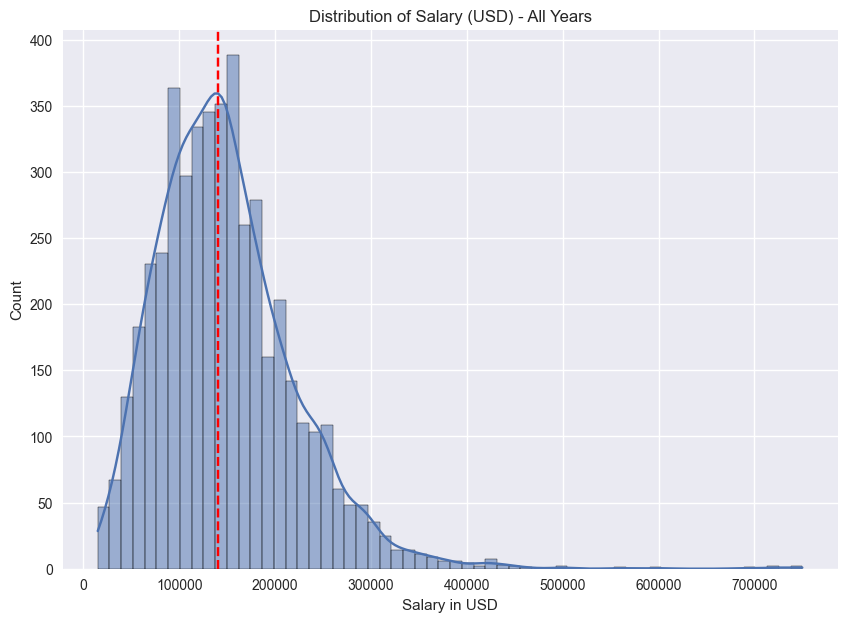

In [2]:
# Figure 1 — Salary Distribution Overall
plt.figure(figsize=(10, 7))
sns.histplot(df['salary_in_usd'], bins=60, kde=True)
plt.title('Distribution of Salary (USD) - All Years')
plt.xlabel('Salary in USD')
plt.axvline(df['salary_in_usd'].median(), color='red', linestyle='--')
plt.show()

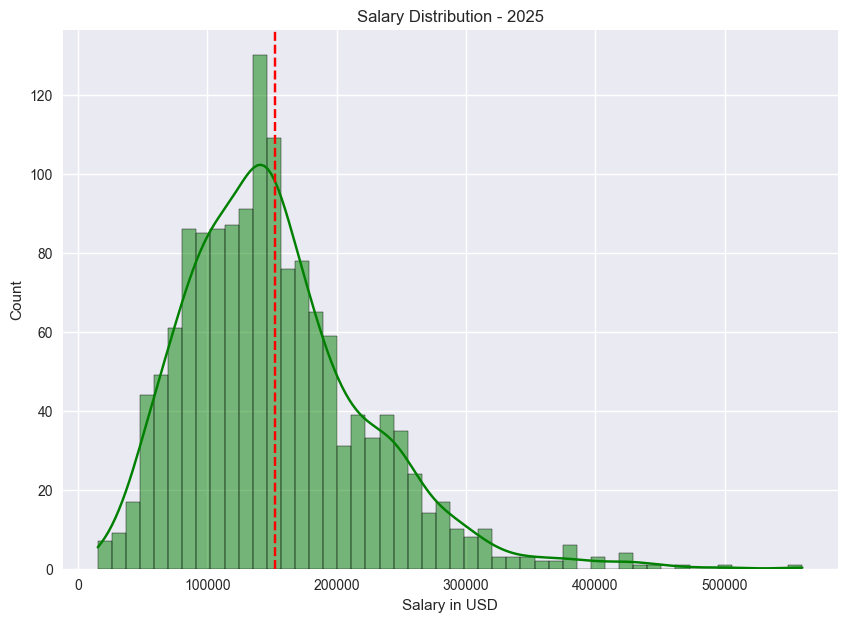

In [3]:
# Figure 2 — Salary Distribution 2025
plt.figure(figsize=(10, 7))
sns.histplot(df[df['work_year']==2025]['salary_in_usd'], bins=50, kde=True, color='green')
plt.title('Salary Distribution - 2025')
plt.xlabel('Salary in USD')
plt.axvline(152000, color='red', linestyle='--')
plt.show()

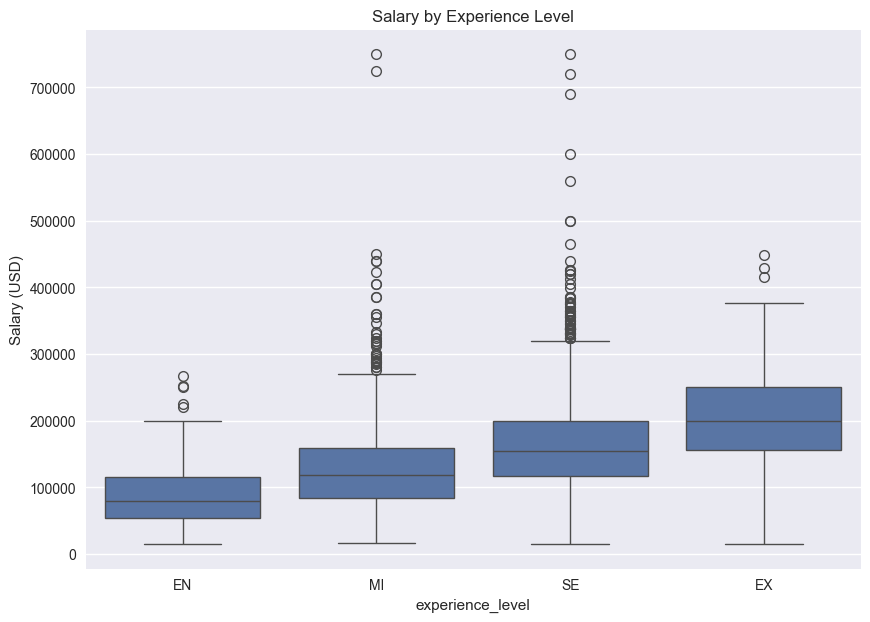

In [4]:
# Figure 3 — Salary by Experience Level
plt.figure(figsize=(10, 7))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

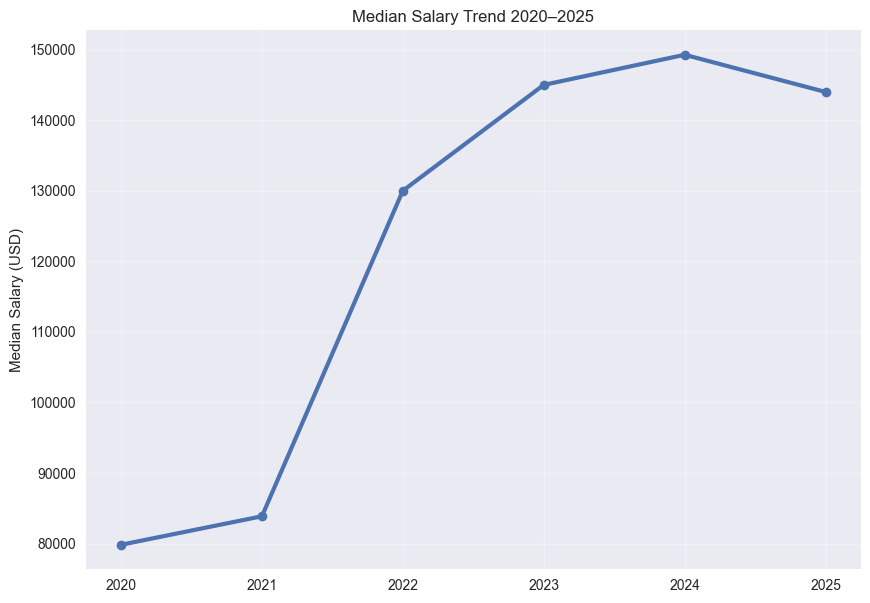

In [5]:
# Figure 4 — Salary Trend Over Years
plt.figure(figsize=(10, 7))
yearly = df.groupby('work_year')['salary_in_usd'].median()
plt.plot(yearly.index, yearly.values, marker='o', linewidth=3)
plt.title('Median Salary Trend 2020–2025')
plt.ylabel('Median Salary (USD)')
plt.grid(True, alpha=0.3)
plt.show()

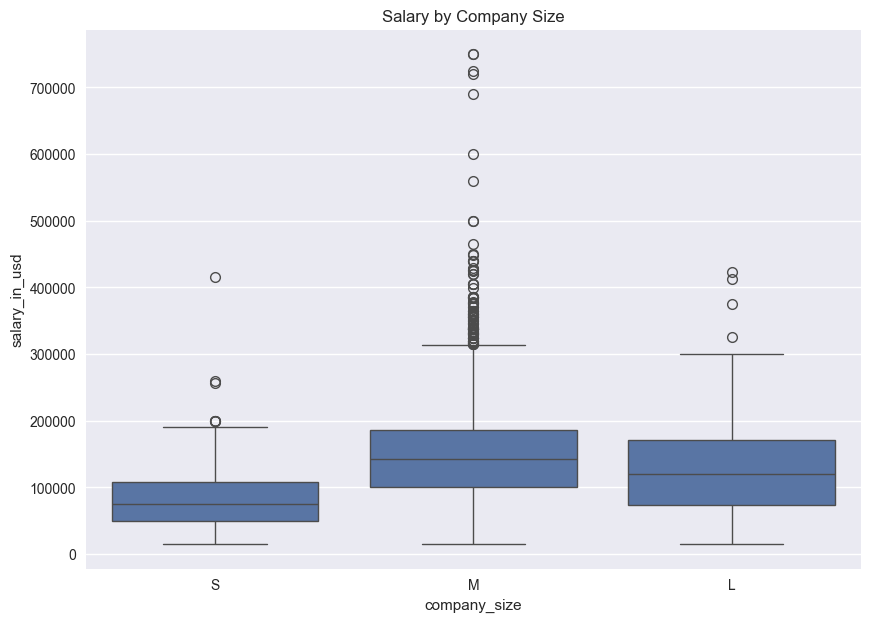

In [6]:
# Figure 5 — Salary by Company Size
plt.figure(figsize=(10, 7))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=['S','M','L'])
plt.title('Salary by Company Size')
plt.show()

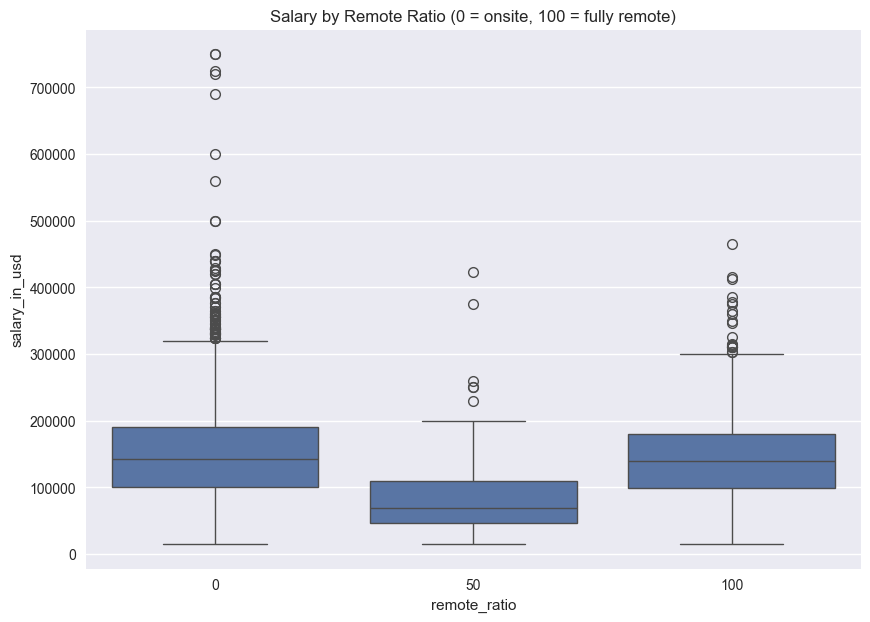

In [7]:
# Figure 6 — Salary by Remote Ratio
plt.figure(figsize=(10, 7))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Salary by Remote Ratio (0 = onsite, 100 = fully remote)')
plt.show()

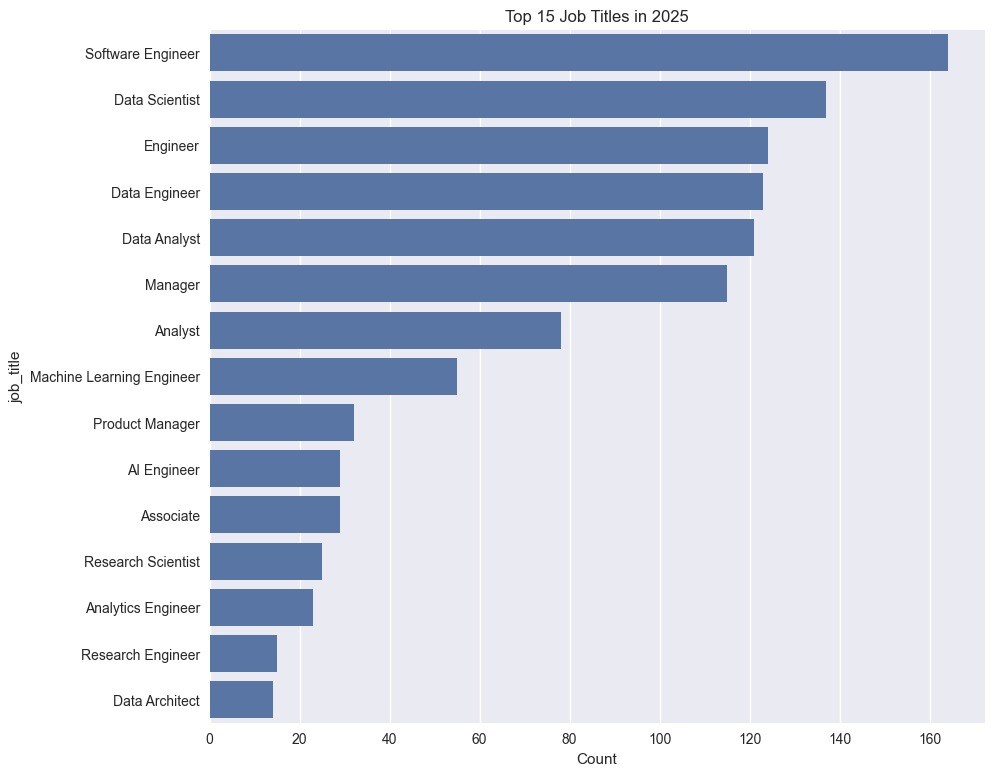

In [8]:
# Figure 7 — Top 15 Job Titles in 2025
plt.figure(figsize=(10, 9))
top15 = df[df['work_year']==2025]['job_title'].value_counts().head(15)
sns.barplot(y=top15.index, x=top15.values)
plt.title('Top 15 Job Titles in 2025')
plt.xlabel('Count')
plt.show()

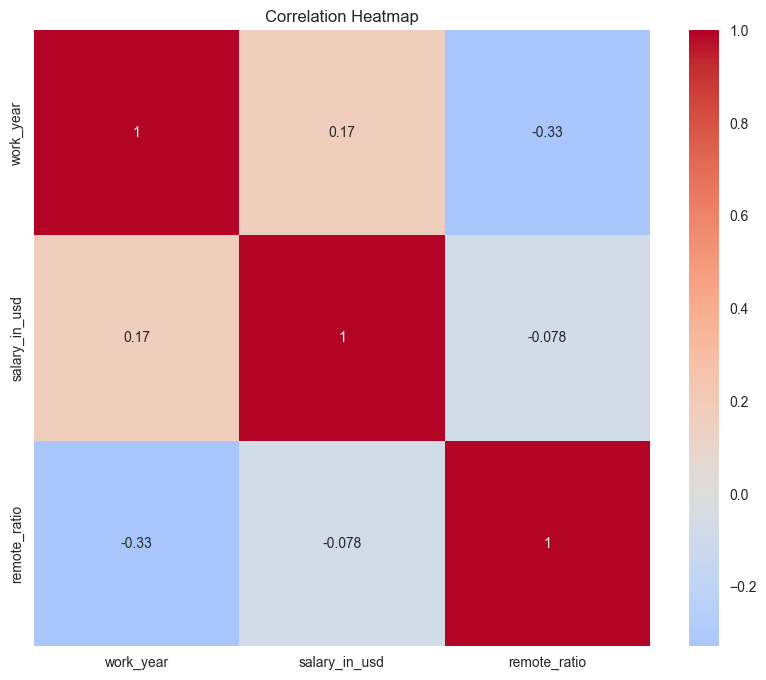

In [9]:
# Figure 8 — Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x700 with 0 Axes>

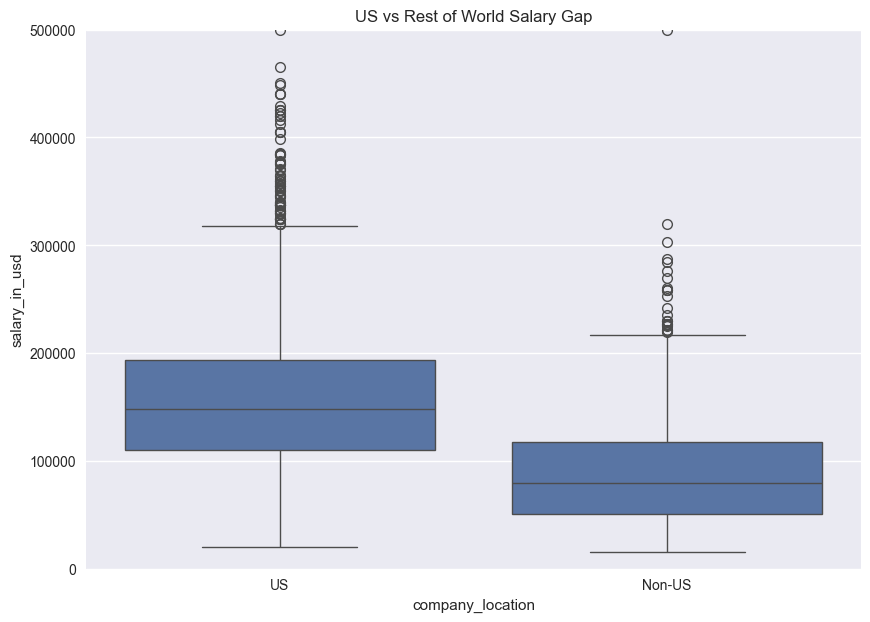

In [10]:
# Figure 9 — US vs Non-US Salary Gap
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df,
    x=df['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US'),
    y='salary_in_usd'
)
plt.title('US vs Rest of World Salary Gap')
plt.ylim(0, 500000)
plt.show()

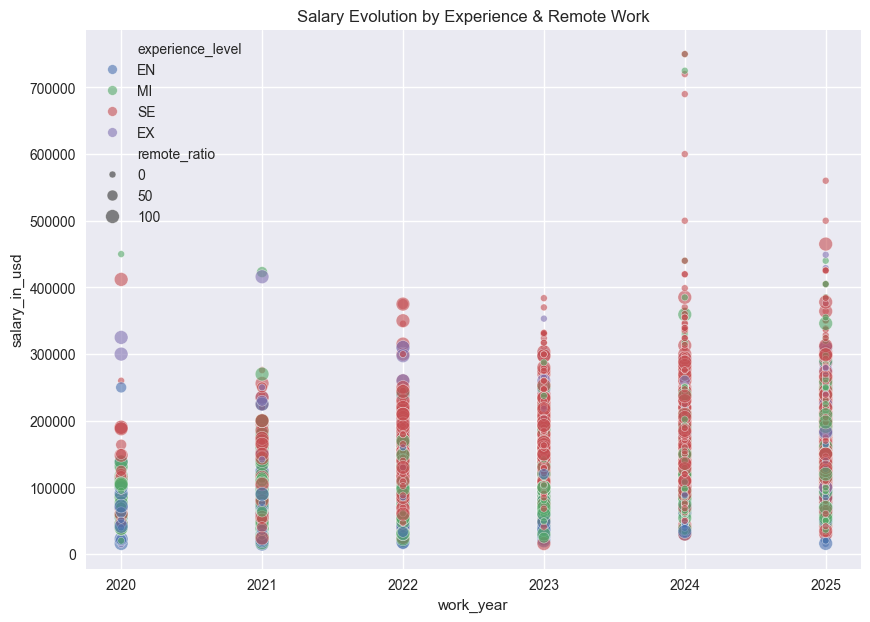

In [11]:
# Figure 10 — Salary vs Year colored by Experience
plt.figure(figsize=(10, 7))
sns.scatterplot(x='work_year', y='salary_in_usd', hue='experience_level',
                size='remote_ratio', data=df, alpha=0.6)
plt.title('Salary Evolution by Experience & Remote Work')
plt.show()

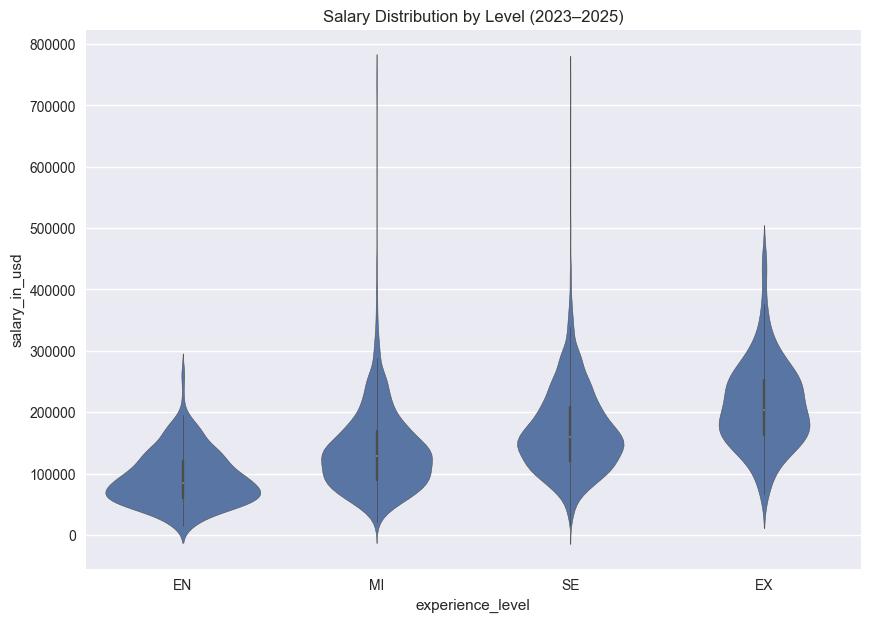

In [12]:
# Figure 11 — Violin Plot (Levels)
plt.figure(figsize=(10, 7))
sns.violinplot(x='experience_level', y='salary_in_usd', data=df[df['work_year']>=2023])
plt.title('Salary Distribution by Level (2023–2025)')
plt.show()

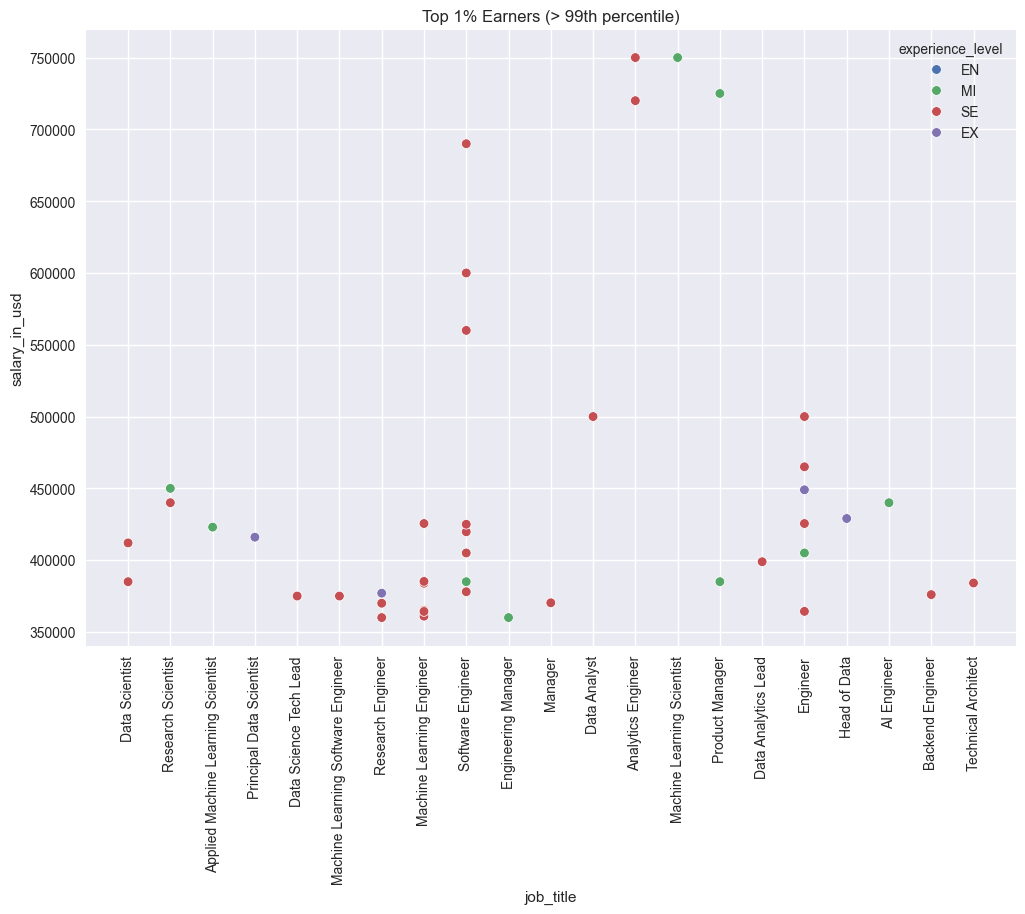

In [13]:
# Figure 12 — Outliers: Top 1% Earners
plt.figure(figsize=(12, 8))
top1pct = df[df['salary_in_usd'] > df['salary_in_usd'].quantile(0.99)]
sns.scatterplot(data=top1pct, x='job_title', y='salary_in_usd', hue='experience_level')
plt.xticks(rotation=90)
plt.title('Top 1% Earners (> 99th percentile)')
plt.show()